## ML-for-NLP2: Homework
<div class="alert alert-success">
    <b>Challenge 1 </b>:
     <ul>

What are the top ten words mentioned by Biden in the 105 congress (after stopwords removal)? For each most frequent word, find the 10 most simlar words generated using word2vec. Find the most frequent bigrams in the text. Explore some bigrams and figure out if the tokens appear in the list of most similar words.

   </ul>

</div>

In [1]:
import numpy as np
from numpy import array
import pickle
import pandas as pd
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [2]:
# opening Biden speech text
file = open('Inputs/105-extracted-date/105-biden-de.txt', "r").read()
soup = BeautifulSoup(file) #use BeautifulSoup library for parsing contents since the document have XML format
doc = ''
for word in soup.find_all('text'): #loop for extracting only text within <text> tag
    find_all_syntax=word.get_text()
    doc = doc + find_all_syntax

### Pre-processing

In [3]:
# splitting the speech by paragraphs and creating a list of paragraphs
pars = re.split('\n| \n', doc)
pars = [x for x in pars if x.strip()]

In [4]:
#the stopword list provided by the NLTK library
stop_words1 = stopwords.words('english')

#the stopword list provided by the professor
drop_file = open('Inputs/droplist.txt', "r").read()
drop_file = drop_file.replace('"', '')
drop_list = drop_file.split("\n")
stop_words2 = drop_list[1:]
stop_words = set(stop_words1+stop_words2)

In [5]:
def get_wordnet_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [6]:
def preprocessing_text(text):
    text = re.sub(r'[^A-Za-z0-9 ]+', ' ', text) #remove all non‐alphanumeric characters except white space
    words = word_tokenize(text.lower())
    tokens = [word for word in words if word not in stop_words]
    tokens = [token for token in tokens if not any(c.isdigit() for c in token)] #remove everything containing digits
    tokens = [token for token in tokens if len(token)>=2]
    lemmatizer = WordNetLemmatizer()
    tokens_lematized = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    tokens_lematized = [token for token in tokens_lematized if token not in stop_words]
    preprocessed_text = ' '.join(tokens_lematized)
    return preprocessed_text 

The preprocessing takes some time, so once done I saved it as a pickle file and used the saved pickle file when I need to rerun the code.  

In [7]:
with open("Inputs/preprocessed_biden105.pkl", "rb") as fp:   # Unpickling
    text_biden = pickle.load(fp)
    
text = text_biden

In [8]:
# checking how the preprocessed text (without bigrams) looks like
text[:5]

['president pleased senate passing substitute amendment hopeful body pas measure congress adjourns',
 'legislation simple current federal law faith credit child custody custody define include visitation evidence country court automatically recognize visitation particularly visitation child parent grandparent court suppose honor arduous process',
 'legislation simply clarifies faith credit law include visitation absolutely court visitation enter consistently provision federal faith credit statute faith credit narrow legal sense current federal law law explicit hopefully eliminate hassle obstacle delay confront valid visitation federal law follow',
 'president author idea representative rob andrew jersey deserves credit bring issue attention day introduce bill visitation tireless push passage commend congratulate',
 'finally thank senator willingness move bill final day session lot press issue lose final crunch chairman staff gracious pas bill']

**Bigrams** 

In [9]:
from gensim.models import Phrases

# finding bigrams in text 
sentence_stream = [par.split(" ") for par in text]
bigram = Phrases(sentence_stream, min_count=20, threshold=2)

In [10]:
# preprocessed text with bigrams included
text_bigram =[] 

for par in text:
    bigram_tokens = bigram[par.split()]
    preprocessed_text = ' '.join(bigram_tokens)
    text_bigram.append(preprocessed_text)

In [11]:
# checking how the preprocessed text (with bigrams) looks like
text_bigram[:6]

['president_pleased senate passing substitute amendment hopeful body pas measure congress adjourns',
 'legislation simple current federal law faith credit child custody custody define include visitation evidence country court automatically recognize visitation particularly visitation child parent grandparent court suppose honor arduous process',
 'legislation simply clarifies faith credit law include visitation absolutely court visitation enter consistently provision federal faith credit statute faith credit narrow legal sense current federal law law explicit hopefully eliminate hassle obstacle delay confront valid visitation federal law follow',
 'president author idea representative rob andrew jersey deserves credit bring issue attention day introduce bill visitation tireless push passage commend congratulate',
 'finally thank_senator willingness move bill final day session lot press issue lose final crunch chairman staff gracious pas bill',
 'president include omnibus appropriation_

### Top-10: all words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
count = vectorizer.fit_transform(text_bigram)

In [13]:
df = pd.DataFrame(count.toarray().transpose(),index=vectorizer.get_feature_names())
df.loc[:,'Total'] = df.sum(axis=1) 

df

,0,1,2,3,4,5,6,7,8,9,...,5791,5792,5793,5794,5795,5796,5797,5798,5799,Total
abandon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
abandonment,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abbey,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
abduction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,34
zubak,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zumwalt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
zurich,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
df_sorted = df.sort_values(by='Total', ascending=False)
df_sorted.head(10)

,0,1,2,3,4,5,6,7,8,9,...,5791,5792,5793,5794,5795,5796,5797,5798,5799,Total
president,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1359
senator,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,817
nato,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,750
time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,653
country,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,575
amendment,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,531
bill,0,0,0,1,2,1,2,1,0,0,...,0,0,0,0,0,0,0,0,0,521
senate,1,0,0,0,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,478
united,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,444
treaty,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,442


In [15]:
top10 = list(df_sorted.index[:10])
top10

['president',
 'senator',
 'nato',
 'time',
 'country',
 'amendment',
 'bill',
 'senate',
 'united',
 'treaty']

### Top-10: only bigrams

In [16]:
def find_bigram(text):
    words = word_tokenize(text)
    tokens = [word for word in words if '_' in word]
    bigrams = ' '.join(tokens)
    return bigrams

In [17]:
all_bigrams = [find_bigram(par) for par in text_bigram]

In [18]:
bigram_count = vectorizer.fit_transform(all_bigrams)

In [19]:
df_bigram = pd.DataFrame(bigram_count.toarray().transpose(),index=vectorizer.get_feature_names())
df_bigram.loc[:,'Total'] = df_bigram.sum(axis=1) 

df_bigram

,0,1,2,3,4,5,6,7,8,9,...,5791,5792,5793,5794,5795,5796,5797,5798,5799,Total
address_chair,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,35
advice_consent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
american_people,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,48
appropriation_bill,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
appropriation_committee,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
world_war,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,56
yield_floor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,92
yield_minute,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,31
yield_time,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21


In [20]:
df_bigram_sorted = df_bigram.sort_values(by='Total', ascending=False)
df_bigram_sorted.iloc[:,-1:].head(10)

,Total
united_nation,164
foreign_policy,161
chemical_weapon,155
nato_enlargement,115
foreign_relation,110
nuclear_weapon,96
yield_floor,92
madam_president,75
arm_control,72
law_enforcement,67


In [21]:
top10_bigram = list(df_bigram_sorted.index[:10])

### Ten most similar words

In [22]:
sentence_stream = [par.split(" ") for par in text_bigram]

In [23]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=sentence_stream, vector_size=100, window=5, min_count=1, workers=4)

In [24]:
# create a dataframe with ten most similar words for top 10 frequent words
df_sim = pd.DataFrame()

for i in top10:
    column = []
    for j in range(10):
        column.append(model.wv.most_similar(i, topn=10)[j][0])
    df_sim[i] = column

In [25]:
df_sim

,president,senator,nato,time,country,amendment,bill,senate,united,treaty
0,issue,amendment,russia,speak,democracy,vote,legislation,floor,lead,ratify
1,offer,minute,germany,wish,nation,senator,offer,vote,nation,ratification
2,hope,colleague,country,yield,political,colleague,introduce,colleague,arm,comprehensive
3,wish,vote,alliance,president,american,senate,president,legislation,ability,sign
4,debate,friend,security,friend,russia,floor,pass,offer,maintain,convention
5,republican,floor,european,debate,threat,minute,support,debate,democracy,pas
6,thank,senate,threat,understand,economic,friend,provision,bill,china,opponent
7,suggest,chairman,europe,republican,united,time,hope,president,american,require
8,believe,time,stability,suggest,lead,offer,issue,pass,country,provision
9,understand,distinguish,nation,offer,alliance,speak,record,time,organization,agreement


The association/similarity does not always make sense in an obvious way. The examples of similarity scores below show that there is very small difference in scores among the top 10 similar words, and I guess that for less similar words the situation would be the same. With so many words having such insignificant difference in similarity scores, it is not really surprising that some 'similar' words do not clearly make sense. 

In [26]:
model.wv.most_similar('president', topn=10)

[('issue', 0.9997198581695557),
 ('offer', 0.9997075200080872),
 ('hope', 0.9997066259384155),
 ('wish', 0.9996861219406128),
 ('debate', 0.9996830224990845),
 ('republican', 0.999679684638977),
 ('thank', 0.9996749758720398),
 ('suggest', 0.9996693134307861),
 ('believe', 0.9996669292449951),
 ('understand', 0.9996629357337952)]

In [27]:
model.wv.most_similar('bill', topn=10)

[('legislation', 0.999627947807312),
 ('offer', 0.99957674741745),
 ('introduce', 0.9995216727256775),
 ('president', 0.9994924068450928),
 ('pass', 0.99949049949646),
 ('support', 0.9994831681251526),
 ('provision', 0.9993959069252014),
 ('hope', 0.999373197555542),
 ('issue', 0.9993709325790405),
 ('record', 0.9993494749069214)]

### Ten most similar words for bigrams

In [28]:
df_sim2 = pd.DataFrame()

for i in top10_bigram:
    column = []
    for j in range(20):
        column.append(model.wv.most_similar(i, topn=20)[j][0])
    df_sim2[i] = column

In [29]:
df_sim2

,united_nation,foreign_policy,chemical_weapon,nato_enlargement,foreign_relation,nuclear_weapon,yield_floor,madam_president,arm_control,law_enforcement
0,include,step,convention,serve,arm_service,war,congress,reason,start,federal
1,action,commitment,require,leader,committee,police,majority,tell,significant,woman
2,result,mean,protocol,begin,chairman,weapon,moment,look,weapon,service
3,body,action,step,decision,rank,nuclear,negotiation,view,milosevic,system
4,require,continue,sign,democratic,hearing,system,suggest,try,negotiate,criminal
5,foreign_policy,result,china,week,finance,chemical,argue,name,word,public
6,party,term,list,look,distinguish,ability,look,approach,action,police
7,major,include,effect,argument,colleague,test,decision,understand,step,officer
8,decision,police,ratify,try,senate,china,try,add,produce,fight
9,establish,allow,produce,former,appropriation_committee,organization,close,hope,opponent,include


In [30]:
model.wv.most_similar('foreign_relation', topn=10)

[('arm_service', 0.9975398778915405),
 ('committee', 0.9973533153533936),
 ('chairman', 0.9966986179351807),
 ('rank', 0.9954182505607605),
 ('hearing', 0.9945822358131409),
 ('finance', 0.9942209720611572),
 ('distinguish', 0.9940541982650757),
 ('colleague', 0.9938916563987732),
 ('senate', 0.9935785531997681),
 ('appropriation_committee', 0.993306040763855)]

As we can see, sometimes bigrams appear as most similar words to another bigrams but not very frequently and not always in top 10. Top 5 most frequently used bigram 'foreign_relation' seems to have more bigrams as most similar words, with 'arm_service' bigram being top-1 in similarity.

<div class="alert alert-success">
    <b>Challenge 2</b>:
     <ul>

Use the senator speeches in the folder 105-extracted-date and use doc2vec to find whose senator speech is closest to senator Biden. Use sen105kh_fix.csv and/or Wikipedia to validate your findings (i.e., understand if the most similar speeches are senators from the same state and/party).  Describe your findings. Compare with the outcome you got/will get using cosine similarity.

   </ul>

</div>

Notice: part of the code was taken from the previous group assignment where a similar task was given.

In [31]:
import os
import gensim

list_docs=[]

files = os.listdir('Inputs/105-extracted-date')

for file in files:
    xml = open(os.path.join('Inputs/105-extracted-date', file)).read() 
    soup = BeautifulSoup(xml) #use BeautifulSoup library for parsing contents since documents have XML format
    doc = ''
    for word in soup.find_all('text'): #loop for extracting only text within <text> tag
        find_all_syntax=word.get_text()
        doc = doc + find_all_syntax
    list_docs.append(doc)

### Pre-processing

> To save time, I use the saved pickle from the previous assignment that contains already preprocessed text (preprocessing is almost the same as above). I will further preprocess the text a bit (previously lemmatization was done without taking part of speech into account). 

In [32]:
with open("Inputs/preprocessed_docs105.pkl", "rb") as fp:   # Unpickling
    speech_list = pickle.load(fp)
    
speech_list[0][:501]

'president debate final passage omnibus appropriation bill american competitiveness workforce improvement act included title subdivision unanimous consent document printed record included document received administration negotiation inclusion seeking help illuminate meaning provision legislation key document change july version september version copy submitted change marked redlining marking unfortunately submitted copy version copy fax marking appear effect september version unintelligible result'

In [33]:
def preprocessing_tokens(text):
    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    tokens_lematized = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    tokens_lematized = [token for token in tokens_lematized if token not in stop_words]
    return tokens_lematized

In [34]:
# preprocessing text takes more than hour to run, I use the saved pickle file after doing the preprocessing one time
with open("Inputs/preprocessed_tokens105.pkl", "rb") as fp:   # Unpickling
    tokens = pickle.load(fp)

In [35]:
docs_corpus = []

for i in range(len(tokens)):
    docs_corpus.append(gensim.models.doc2vec.TaggedDocument(words=tokens[i], tags=[i]))

### Similarity using doc2vec (gensim)

In [36]:
model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40, seed=10)

In [37]:
model.build_vocab(docs_corpus)

In [38]:
model.train(docs_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [39]:
inferred_vector = model.infer_vector(docs_corpus[6].words)
similarity_list = model.dv.most_similar([inferred_vector], topn=len(model.dv))

similarity_rank = [doc[0] for doc in similarity_list]
similarity_values = [doc[1] for doc in similarity_list]


In [40]:
similarity_list[:10]

[(6, 0.9966257214546204),
 (74, 0.4128933250904083),
 (15, 0.38387131690979004),
 (42, 0.3672589063644409),
 (38, 0.355551540851593),
 (58, 0.35198137164115906),
 (34, 0.34795287251472473),
 (60, 0.3462916910648346),
 (81, 0.3144072890281677),
 (48, 0.30317336320877075)]

#### Validation of findings (i.e., understand if the most similar speeches are senators from the same state and/party).

In [41]:
# read given csv with info about senators
senators_df = pd.read_csv('Inputs/sen105kh_fix.csv',sep = ';')

Now we want to add a column with similarities to the *senators_df*

In [42]:
# create a column in a format "lname-stateab" for future merging 
senators_df['lname_state'] = senators_df[['lname', 'stateab']].agg('-'.join, axis=1)

In [43]:
# creating a list in a format "lname-stateab" following the order from similarity_rank
names_by_rank = []

for i in similarity_rank:
    name = files[i][4:-4]
    names_by_rank.append(name)
    
names_by_rank[:10]

['biden-de',
 'moynihan-ny',
 'byrd-wv',
 'grams-mn',
 'glenn-oh',
 'kerrey-ne',
 'feingold-wi',
 'kohl-wi',
 'roberts-ks',
 'helms-nc']

In [44]:
# create a df with names and gensim/doc2vec similarities
similarity_df = pd.DataFrame(
    {'lname_state': names_by_rank, # list of names-states
     'doc2vec_similarity': similarity_values #doc2vec similarities
    })

# join two dataframes
doc2vec_sim_df = pd.merge(senators_df,similarity_df,on='lname_state',how='left')

In [45]:
doc2vec_sim_df 

,cong,lname,stateab,lstate,id,dist,party,lname_state,doc2vec_similarity
0,105,sessions,al,ALABAMA,49700,0,200,sessions-al,0.190924
1,105,shelby,al,ALABAMA,94659,0,200,shelby-al,0.173321
2,105,murkowski,ak,ALASKA,14907,0,200,murkowski-ak,0.107754
3,105,stevens,ak,ALASKA,12109,0,200,stevens-ak,0.074688
4,105,kyl,az,ARIZONA,15429,0,200,kyl-az,0.293822
...,...,...,...,...,...,...,...,...,...
95,105,rockefeller,wv,WEST VI,14922,0,100,rockefeller-wv,0.059315
96,105,feingold,wi,WISCONS,49309,0,100,feingold-wi,0.347953
97,105,kohl,wi,WISCONS,15703,0,100,kohl-wi,0.346292
98,105,enzi,wy,WYOMING,49706,0,200,enzi-wy,0.016514


The next step is to clean the dataframe. There is only one change we should do: replace numbers in party with the correct name. As Biden is Democrat and his party is 100, we replace 100 with 'democratic'. 

In [46]:
doc2vec_sim_df['party'] = doc2vec_sim_df['party'].replace(100, 'democratic')
doc2vec_sim_df['party'] = doc2vec_sim_df['party'].replace(200, 'republican')
doc2vec_sim_df['is_democrat'] = np.where(doc2vec_sim_df['party'] == 'democratic', 1,0)

Sort df by similarity value:

In [47]:
doc2vec_sim_df = doc2vec_sim_df.sort_values(by=['doc2vec_similarity'], ascending=False).reset_index(drop=True)
doc2vec_sim_df = doc2vec_sim_df.drop(['cong', 'stateab', 'id', 'dist'], axis=1)

Now let's look on the info about top 10 speeches similar to Biden's one (including Biden's speech itself as top-0):

In [48]:
doc2vec_sim_df.head(11)

,lname,lstate,party,lname_state,doc2vec_similarity,is_democrat
0,biden,DELAWAR,democratic,biden-de,0.996626,1
1,moynihan,NEW YOR,democratic,moynihan-ny,0.412893,1
2,byrd,WEST VI,democratic,byrd-wv,0.383871,1
3,grams,MINNESO,republican,grams-mn,0.367259,0
4,glenn,OHIO,democratic,glenn-oh,0.355552,1
5,kerrey,NEBRASK,democratic,kerrey-ne,0.351981,1
6,feingold,WISCONS,democratic,feingold-wi,0.347953,1
7,kohl,WISCONS,democratic,kohl-wi,0.346292,1
8,roberts,KANSAS,republican,roberts-ks,0.314407,0
9,helms,NORTH C,republican,helms-nc,0.303173,0


- As we can see, almost all similar speeches in the top 7 (except the third most similar speech) were given by democrats. It is not surprising since we expect politicians from the same party to have to some extent similar speeches. 
- We can also notice that the states in the top such as New York, West Virginia, Ohio and North Carolina are located in the north-western part of the country, same as Delawar that was represented by Biden. It makes sense that politicians from the same region/part of the country may have similar speech contents. 
- The presence of speeches from republicans in the top can be to some extent explained by the fact that politically Biden was known as a centrist who would work “across-the-aisle” with his Republican counterparts and therefore some alignment with centrist members of both parties could take place. 

### Cosine Similarity (TF-IDF)

Now let's compare these results with the outcome that we get using cosine similarity. Let's transform the collection of preprocessed text to a matrix of TF-IDF features first.

In [49]:
# creating the list of preprocessed speech texts from the list of preprocessed tokens 
speech_list = [' '.join(token) for token in tokens]
len(speech_list)

100

I need to choose the right parameters for TF-IDF vectorization. I use *max_df* = 0.85, deciding to ignore the words that appear in more than 85% of the speech documents (e.g. 'president', 'senate', etc.) in order to get more meaningful results in cosine similarity analysis. Moreover, I set *min_df* to 0.02, that is I want vectorizer to ignore terms that appear in less than 2 documents.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df= 0.02, max_df = 0.85) 
tfidf = vectorizer.fit_transform(speech_list)

In [51]:
tfidf_df= pd.DataFrame(tfidf.toarray().transpose(), index=vectorizer.get_feature_names())

#rename columns name
for i in range(100):
    tfidf_df = tfidf_df.rename(columns={i: files[i][4:-4]})

In [52]:
tfidf_df

,abraham-mi,akaka-hi,allard-co,ashcroft-mo,baucus-mt,bennett-ut,biden-de,bingaman-nm,bond-mo,boxer-ca,...,snowe-me,specter-pa,stevens-ak,thomas-wy,thompson-tn,thurmond-sc,torricelli-nj,warner-va,wellstone-mn,wyden-or
aaa,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
aaav,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
aamc,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.005176,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
aapcc,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.09607
aapd,0.000000,0.0,0.0,0.0,0.006898,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zuni,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.003948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
zurich,0.004491,0.0,0.0,0.0,0.000000,0.0,0.003683,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
zvi,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000
zygote,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.006074,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000


In [53]:
from sklearn.metrics.pairwise import cosine_similarity

corpus_array = tfidf_df.to_numpy()

cos_similarity = [] #list of similarities values for Biden's speech

# compare each speech with Biden's
for i in range(100):
    temp_sim = cosine_similarity(corpus_array[:,i].reshape(1, -1), corpus_array[:,6].reshape(1, -1)) # 6th column belongs to Biden's speech
    cos_similarity.append(temp_sim[0][0])

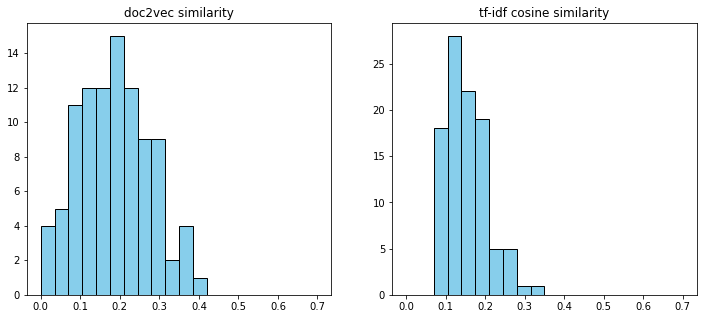

In [54]:
from matplotlib import pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(similarity_values, bins=20, range=[0.0,0.7],edgecolor='black', color = "skyblue")
axes[0].set_title('doc2vec similarity')
axes[1].hist(cos_similarity, bins=20, range=[0.0,0.7],edgecolor='black', color = "skyblue",)
axes[1].set_title('tf-idf cosine similarity')
plt.show()

The distribution now is more shrinked, partially due to the parameters of max_df and min_df.

In [55]:
# create a df with names and cosine similarities
similarity_df = pd.DataFrame(
    {'lname_state': list(tfidf_df.columns.values), # list of names-states
     'tfidf_similarity': cos_similarity # cosine similarities
    })

# join gensim and cosine similary dataframes for comparison purposes
cosine_sim_df = pd.merge(doc2vec_sim_df,similarity_df,on='lname_state',how='left')

In [56]:
cosine_sim_df = cosine_sim_df.sort_values(by=['tfidf_similarity'], ascending=False).reset_index(drop=True)

# creating columns with ranks for comparison purposes
cosine_sim_df['doc2vec_rank'] = cosine_sim_df['doc2vec_similarity'].rank(ascending=False).astype(int)-1
cosine_sim_df['tdidf_cosine_rank'] = cosine_sim_df['tfidf_similarity'].rank(ascending=False).astype(int)-1

cosine_sim_df.head(11)

,lname,lstate,party,lname_state,doc2vec_similarity,is_democrat,tfidf_similarity,doc2vec_rank,tdidf_cosine_rank
0,biden,DELAWAR,democratic,biden-de,0.996626,1,1.000000,0,0
1,roberts,KANSAS,republican,roberts-ks,0.314407,0,0.339227,8,1
2,roth,DELAWAR,republican,roth-de,0.114347,0,0.282692,72,2
3,warner,VIRGINI,republican,warner-va,0.284632,0,0.275209,16,3
4,lieberman,CONNECT,democratic,lieberman-ct,0.245768,1,0.267672,25,4
5,smith,OREGON,republican,smith-or,0.135118,0,0.265063,65,5
6,kyl,ARIZONA,republican,kyl-az,0.293822,0,0.257389,12,6
7,byrd,WEST VI,democratic,byrd-wv,0.383871,1,0.252850,2,7
8,damato,NEW YOR,republican,damato-ny,0.165471,0,0.244783,56,8
9,kerry,MASSACH,democratic,kerry-ma,0.234086,1,0.241991,27,9


- The results for cosine similarity analysis using TF-IDF approach are very different from what we had when we used doc2vec similarity. Only the speeches previously ranked as 2nd and 8th appear in these new top-10. 
- As we can see, top 3 similar speeches were given by republicans. This is a bit surprising, since we expected to see more democrats on the top. However, at the same time, as it was mentioned before, this can happen due to Biden being more a centrist rather than solid democrat.
- In addition, we can see that the second most similar speech to Biden's was given by Roth, who is from the same state. It is reasonable that senators from the same state would talk about similar things.

